In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = 'ev_charging_patterns.csv'
data = pd.read_csv(file_path) 

In [9]:
data.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (¬∞C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01/01/24 0:00,01/01/24 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/24 1:00,01/01/24 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/24 2:00,01/01/24 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01/01/24 3:00,01/01/24 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/24 4:00,01/01/24 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


# Checking For missing values 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1320 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1320 non-null   float64
 10  Charging Cost (USD)                 

# 1) Histogram of Energy Consumed (kWh)

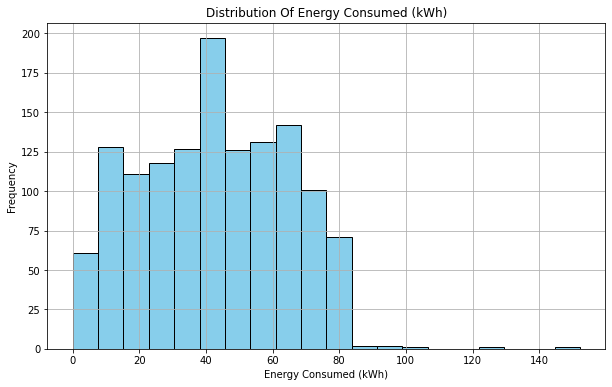

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['Energy Consumed (kWh)'], bins=20, color='skyblue', edgecolor='black')  
plt.title('Distribution Of Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# The histogram shows that most EV charging sessions consume between 20 and 60 kWh, with a peak around 40 kWh. Very few sessions exceed 80 kWh of energy consumption. Overall, the data indicates that moderate energy consumption is typical, with only a few outliers.

# 2) Scatter plot of Energy Consumed vs Battery Capacity

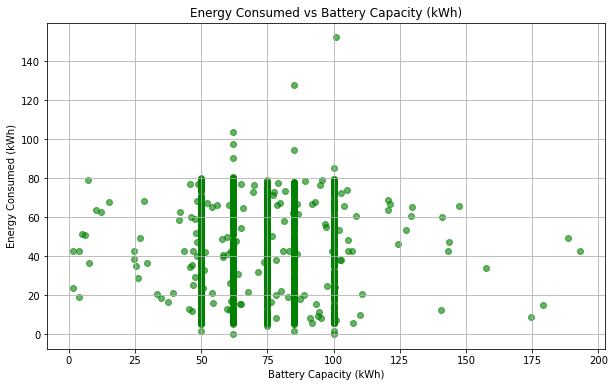

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Battery Capacity (kWh)'], data['Energy Consumed (kWh)'], color='green', alpha=0.6)  
plt.title('Energy Consumed vs Battery Capacity (kWh)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Energy Consumed (kWh)')
plt.grid(True)
plt.show()


# The scatter plot shows a weak positive correlation between battery capacity and energy consumed. Most vehicles with a battery capacity between 50 and 100 kWh consume between 20 and 80 kWh of energy. There are some outliers, but overall, the data suggests that energy consumption isn't solely dependent on battery capacity.

# 3) Scatter plot of Energy Consumed vs Charging Duration

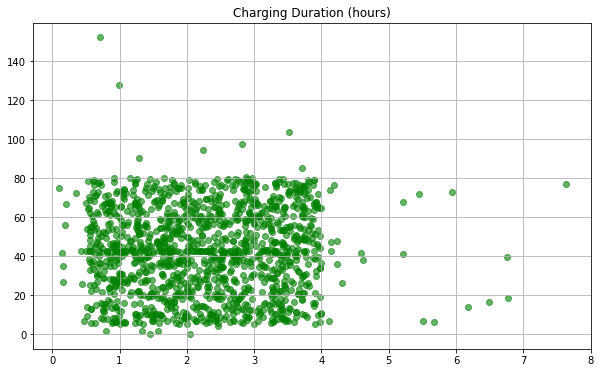

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(data['Charging Duration (hours)'], data['Energy Consumed (kWh)'],color='green',alpha=0.6)
plt.title('Charging Duration (hours)')
plt.grid(True)
plt.show()

# Most EV charging sessions last between 1 and 4 hours, with energy consumption ranging from 0 to 80 kWh. A few outliers show longer sessions beyond 4 hours, with higher energy consumption, likely for larger battery vehicles. Overall, the majority of sessions fall within a moderate range of both time and energy usage.

# 4) Box plot of Charging Cost vs Vehicle Model 

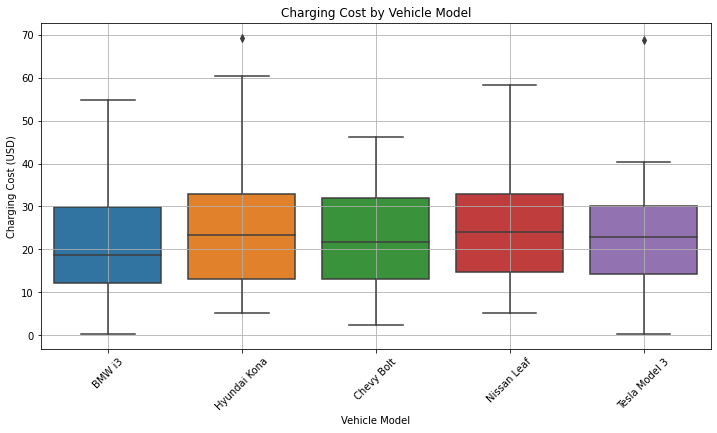

In [22]:
if 'Vehicle Model' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Vehicle Model', y='Charging Cost (USD)', data=data)  
    plt.title('Charging Cost by Vehicle Model')
    plt.xticks(rotation=45)  
    plt.grid(True)
    plt.show()


# Most vehicle models have a median charging cost between 20 and 30 USD. However, Hyundai Kona and Tesla Model 3 show a wider range of costs, with outliers reaching up to 70 USD. This suggests these models may occasionally have higher charging expenses, likely due to longer sessions or higher energy demand.

# 5) Correlation heatmap for numerical features

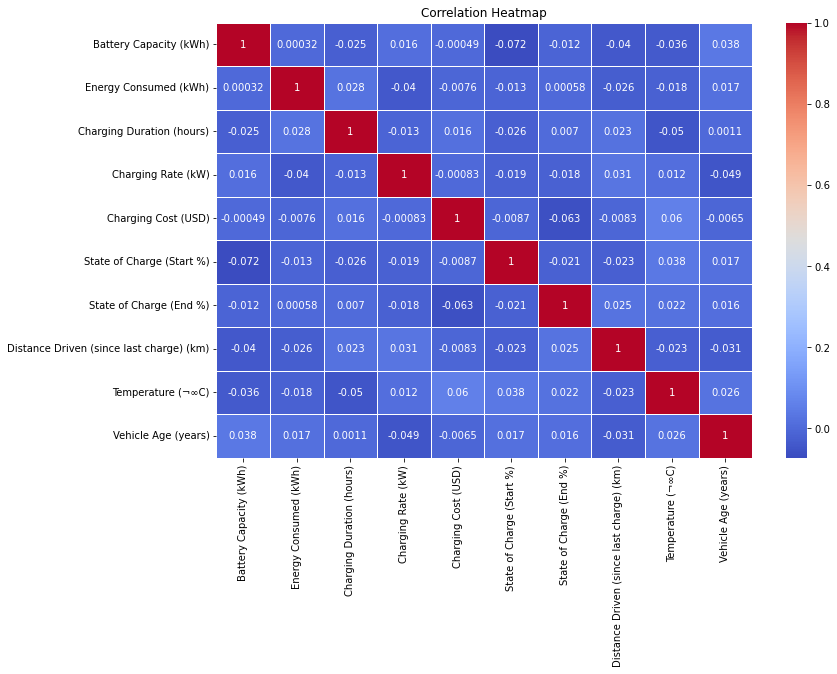

In [26]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# The heatmap shows that the dataset's variables are generally weakly correlated, suggesting that there is no single factor driving energy consumption, cost, or charging duration. The relationships between variables are relatively weak, which may indicate that other factors not present in the dataset are influencing the charging behavior and costs.